In [194]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import tree
import graphviz
from sklearn.decomposition import PCA




df = pd.read_csv("clean_data.csv")

df.drop(df.columns[0], axis=1, inplace=True)
df = df[df["offset_minutes"] >= 0]
df = df[df["offset_minutes"] <= 500]
df = df.dropna(subset=['time_bin'])






#normalize
df['offset_minutes'] = (df['offset_minutes'] - df['offset_minutes'].min()) / (df['offset_minutes'].max() - df['offset_minutes'].min())
df['Aircraft_Seats'] = (df['Aircraft_Seats'] - df['Aircraft_Seats'].min()) / (df['Aircraft_Seats'].max() - df['Aircraft_Seats'].min())


df1=df.copy()

y = df['offset_minutes']
X=df.drop('offset_minutes', axis=1)


# duplicate and make dummies:

df_encoded = pd.get_dummies(df1, columns=['OriginCode', 'DestinationCode', 'Code_letters', 'time_bin'])
df1.drop(columns=['OriginCode', 'DestinationCode', 'Code_letters', 'time_bin','Aircraft_Seats', 'offset_minutes'], inplace=True)
df1 = pd.concat([df1, df_encoded], axis=1)
df1=df1.drop('offset_minutes', axis=1)




# Split the regular data into training and testing sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)



# Split the dummies data into training and testing sets
X1Train, X1Test, yTrain, yTest = train_test_split(df1, y, test_size=0.2, random_state=0)




In [195]:
# Decision tree with dummies:

# Train the decision tree on the encoded data
decisionTree = tree.DecisionTreeRegressor()
decisionTree.fit(X1Train, yTrain)

# Make predictions using the test data
y_pred_train = decisionTree.predict(X1Train)




# Calculate the MAE, MSE, and R^2 for the training data
mae_train = metrics.mean_absolute_error(yTrain, y_pred_train)
mse_train = metrics.mean_squared_error(yTrain, y_pred_train)
r2_train = metrics.r2_score(yTrain, y_pred_train)

print('MAE on training data = ', mae_train)
print('MSE on training data = ', mse_train)
print('R^2 on training data = ', r2_train)

# Predict the target values for the test data
y_pred = decisionTree.predict(X1Test)

# Calculate the MAE, MSE, and R^2 for the test data
mae_test = metrics.mean_absolute_error(yTest, y_pred)
mse_test = metrics.mean_squared_error(yTest, y_pred)
r2_test = metrics.r2_score(yTest, y_pred)

print('MAE on test data = ', mae_test)
print('MSE on test data = ', mse_test)
print('R^2 on test data = ', r2_test)






MAE on training data =  0.03831824731686695
MSE on training data =  0.003865243846746348
R^2 on training data =  0.15591128406523458
MAE on test data =  0.040218525913427276
MSE on test data =  0.004318864477728126
R^2 on test data =  0.06966104497440961


In [196]:
# Visualize the decision tree
X1Train = pd.DataFrame(X1Train)

dot_data = tree.export_graphviz(decisionTree, out_file=None, 
                     feature_names=X1Train.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")

graph

In [197]:
# Decision forest with dummies:

# Train the random forest model on the encoded data
randomForest = RandomForestRegressor(n_estimators=100, random_state=0)
randomForest.fit(X1Train, yTrain)

# Make predictions using the test data
y_pred_train = randomForest.predict(X1Train)


# Calculate the MAE, MSE, and R^2 for the training data
mae_train = metrics.mean_absolute_error(yTrain, y_pred_train)
mse_train = metrics.mean_squared_error(yTrain, y_pred_train)
r2_train = metrics.r2_score(yTrain, y_pred_train)

print('MAE on training data = ', mae_train)
print('MSE on training data = ', mse_train)
print('R^2 on training data = ', r2_train)

# Predict the target values for the test data
y_pred = randomForest.predict(X1Test)

# Calculate the MAE, MSE, and R^2 for the test data
mae_test = metrics.mean_absolute_error(yTest, y_pred)
mse_test = metrics.mean_squared_error(yTest, y_pred)
r2_test = metrics.r2_score(yTest, y_pred)

print('MAE on test data = ', mae_test)
print('MSE on test data = ', mse_test)
print('R^2 on test data = ', r2_test)

MAE on training data =  0.038429300202911416
MSE on training data =  0.003870816301747283
R^2 on training data =  0.15469437600643177
MAE on test data =  0.040099024425620154
MSE on test data =  0.004291031716370769
R^2 on test data =  0.07565657973828366


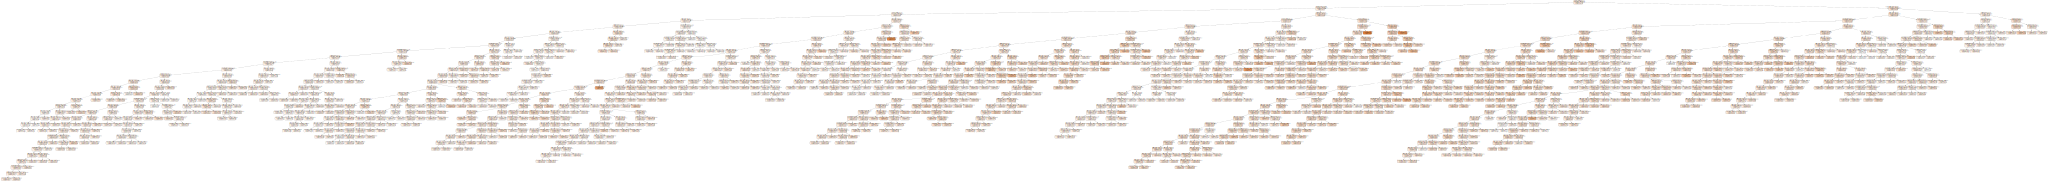

In [198]:
# Visualize the decision forest
estimator = randomForest.estimators_[5]  # choose one of the trees to visualize
dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=X1Train.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_forest")

graph


In [199]:
# Linear regression with dummies:

# Train the linear regression on the encoded data
clf = LinearRegression()
clf.fit(X1Train, yTrain)

# Make predictions using the test data
y_pred_train = clf.predict(X1Train)

# Calculate the MAE, MSE, and R^2 for the training data
mae_train = metrics.mean_absolute_error(yTrain, y_pred_train)
mse_train = metrics.mean_squared_error(yTrain, y_pred_train)
r2_train = metrics.r2_score(yTrain, y_pred_train)

print('MAE on training data = ', mae_train)
print('MSE on training data = ', mse_train)
print('R^2 on training data = ', r2_train)

# Predict the target values for the test data
y_pred = clf.predict(X1Test)

# Calculate the MAE, MSE, and R^2 for the test data
mae_test = metrics.mean_absolute_error(yTest, y_pred)
mse_test = metrics.mean_squared_error(yTest, y_pred)
r2_test = metrics.r2_score(yTest, y_pred)

print('MAE on test data = ', mae_test)
print('MSE on test data = ', mse_test)
print('R^2 on test data = ', r2_test)

# an R^2 value of 0.2 indicates that the model explains 20% of the variance.
# while an R^2 value of -0.2 indicates that the model is worse than using the mean of the dependent variable as a predictor.

MAE on training data =  0.04132469233331112
MSE on training data =  0.004257047289117251
R^2 on training data =  0.07034957627076666
MAE on test data =  12700479.082270468
MSE on test data =  9.013565140812648e+17
R^2 on test data =  -1.9416378581459642e+20


In [200]:
# PCA with 2 principal components
pca = PCA(n_components=2)
principal_components_2 = pca.fit_transform(XTrain)
Train_df_pca_2 = pd.DataFrame(data=principal_components_2, columns=['PC1', 'PC2'])

# PCA with 3 principal components
pca = PCA(n_components=3)
principal_components_3 = pca.fit_transform(XTrain)
Train_df_pca_3 = pd.DataFrame(data=principal_components_3, columns=['PC1', 'PC2', 'PC3'])

# PCA with 4 principal components
pca = PCA(n_components=4)
principal_components_4 = pca.fit_transform(XTrain)
Train_df_pca_4 = pd.DataFrame(data=principal_components_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])




# PCA with 2 principal components
pca = PCA(n_components=2)
principal_components_2 = pca.fit_transform(XTest)
Test_df_pca_2 = pd.DataFrame(data=principal_components_2, columns=['PC1', 'PC2'])

# PCA with 3 principal components
pca = PCA(n_components=3)
principal_components_3 = pca.fit_transform(XTest)
Test_df_pca_3 = pd.DataFrame(data=principal_components_3, columns=['PC1', 'PC2', 'PC3'])

# PCA with 4 principal components
pca = PCA(n_components=4)
principal_components_4 = pca.fit_transform(XTest)
Test_df_pca_4 = pd.DataFrame(data=principal_components_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])

Train_list=[XTrain, Train_df_pca_2, Train_df_pca_3, Train_df_pca_4]
Test_list=[XTest, Test_df_pca_2, Test_df_pca_3, Test_df_pca_4]






In [201]:
#decision trees (regular data, pca2, pca3, pca4)

for train_df, test_df in zip(Train_list, Test_list):
    XTrain = train_df
    XTest = test_df



    # Train the decision tree on the encoded data
    decisionTree = tree.DecisionTreeRegressor()
    decisionTree.fit(XTrain, yTrain)

    # Make predictions using the test data
    y_pred_train = decisionTree.predict(XTrain)




    # Calculate the MAE, MSE, and R^2 for the training data
    mae_train = metrics.mean_absolute_error(yTrain, y_pred_train)
    mse_train = metrics.mean_squared_error(yTrain, y_pred_train)
    r2_train = metrics.r2_score(yTrain, y_pred_train)

    print('MAE on training data = ', mae_train)
    print('MSE on training data = ', mse_train)
    print('R^2 on training data = ', r2_train)

    # Predict the target values for the test data
    y_pred = decisionTree.predict(XTest)

    # Calculate the MAE, MSE, and R^2 for the test data
    mae_test = metrics.mean_absolute_error(yTest, y_pred)
    mse_test = metrics.mean_squared_error(yTest, y_pred)
    r2_test = metrics.r2_score(yTest, y_pred)

    print('MAE on test data = ', mae_test)
    print('MSE on test data = ', mse_test)
    print('R^2 on test data = ', r2_test)


MAE on training data =  0.03831824731686695
MSE on training data =  0.003865243846746348
R^2 on training data =  0.15591128406523458
MAE on test data =  0.04027879766202774
MSE on test data =  0.00432864723491914
R^2 on test data =  0.06755371325578508
MAE on training data =  0.03831824731686695
MSE on training data =  0.003865243846746348
R^2 on training data =  0.15591128406523458
MAE on test data =  0.04929001012582638
MSE on test data =  0.005838072787215948
R^2 on test data =  -0.257595963992582
MAE on training data =  0.03831824731686695
MSE on training data =  0.003865243846746348
R^2 on training data =  0.15591128406523458
MAE on test data =  0.04774428686913143
MSE on test data =  0.005877216675296227
R^2 on test data =  -0.26602806092918274
MAE on training data =  0.038318247316866956
MSE on training data =  0.003865243846746348
R^2 on training data =  0.15591128406523458
MAE on test data =  0.04581060798119109
MSE on test data =  0.005430127841134821
R^2 on test data =  -0.1

In [202]:
#decision forests (regular data, pca2, pca3, pca4)

for train_df, test_df in zip(Train_list, Test_list):
    XTrain = train_df
    XTest = test_df


    # Train the random forest model on the encoded data
    randomForest = RandomForestRegressor(n_estimators=100, random_state=0)
    randomForest.fit(XTrain, yTrain)

    # Make predictions using the test data
    y_pred_train = randomForest.predict(XTrain)


    # Calculate the MAE, MSE, and R^2 for the training data
    mae_train = metrics.mean_absolute_error(yTrain, y_pred_train)
    mse_train = metrics.mean_squared_error(yTrain, y_pred_train)
    r2_train = metrics.r2_score(yTrain, y_pred_train)

    print('MAE on training data = ', mae_train)
    print('MSE on training data = ', mse_train)
    print('R^2 on training data = ', r2_train)

    # Predict the target values for the test data
    y_pred = randomForest.predict(XTest)

    # Calculate the MAE, MSE, and R^2 for the test data
    mae_test = metrics.mean_absolute_error(yTest, y_pred)
    mse_test = metrics.mean_squared_error(yTest, y_pred)
    r2_test = metrics.r2_score(yTest, y_pred)

    print('MAE on test data = ', mae_test)
    print('MSE on test data = ', mse_test)
    print('R^2 on test data = ', r2_test)
   

MAE on training data =  0.03843373267415856
MSE on training data =  0.003871057440455217
R^2 on training data =  0.154641716337233
MAE on test data =  0.04010228711933765
MSE on test data =  0.0042910399528060285
R^2 on test data =  0.07565480550419701
MAE on training data =  0.03843234629805508
MSE on training data =  0.003871663935826077
R^2 on training data =  0.15450927038579831
MAE on test data =  0.043993016640255296
MSE on test data =  0.00471913233090664
R^2 on test data =  -0.016561798594028287
MAE on training data =  0.03843089949952725
MSE on training data =  0.0038709908288402065
R^2 on training data =  0.15465626292596324
MAE on test data =  0.0425239449772121
MSE on test data =  0.004595389555521217
R^2 on test data =  0.0100939867258667
MAE on training data =  0.038430820338606696
MSE on training data =  0.003871043353825986
R^2 on training data =  0.15464479256353347
MAE on test data =  0.04310801700931017
MSE on test data =  0.004601837959099726
R^2 on test data =  0.0

In [203]:
#Linear regressions (regular data, pca2, pca3, pca4)

for train_df, test_df in zip(Train_list, Test_list):
    XTrain = train_df
    XTest = test_df
    
    # Train the linear regression tree on the encoded data
    clf = LinearRegression()
    clf.fit(XTrain, yTrain)

    # Make predictions using the test data
    y_pred_train = clf.predict(XTrain)
    
    # Calculate the MAE, MSE, and R^2 for the training data
    mae_train = metrics.mean_absolute_error(yTrain, y_pred_train)
    mse_train = metrics.mean_squared_error(yTrain, y_pred_train)
    r2_train = metrics.r2_score(yTrain, y_pred_train)

    print('MAE on training data = ', mae_train)
    print('MSE on training data = ', mse_train)
    print('R^2 on training data = ', r2_train)

    # Predict the target values for the test data
    y_pred = clf.predict(XTest)

    # Calculate the MAE, MSE, and R^2 for the test data
    mae_test = metrics.mean_absolute_error(yTest, y_pred)
    mse_test = metrics.mean_squared_error(yTest, y_pred)
    r2_test = metrics.r2_score(yTest, y_pred)

    print('MAE on test data = ', mae_test)
    print('MSE on test data = ', mse_test)
    print('R^2 on test data = ', r2_test)

MAE on training data =  0.04316434013723036
MSE on training data =  0.004474186445125376
R^2 on training data =  0.02293090913328688
MAE on test data =  0.042769229470471425
MSE on test data =  0.00453128945304065
R^2 on test data =  0.02390197321544807
MAE on training data =  0.043670547846114946
MSE on training data =  0.004556743799380252
R^2 on training data =  0.00490210321393203
MAE on test data =  0.043160419505268825
MSE on test data =  0.004618979684792831
R^2 on test data =  0.005012369479331369
MAE on training data =  0.04334146722598149
MSE on training data =  0.004514985347628653
R^2 on training data =  0.014021278954448713
MAE on test data =  0.042955804439750625
MSE on test data =  0.004601801358956335
R^2 on test data =  0.008712801801352477
MAE on training data =  0.04335774156798868
MSE on training data =  0.004513512532701547
R^2 on training data =  0.01434291104544283
MAE on test data =  0.04298688378217099
MSE on test data =  0.004598158659784107
R^2 on test data =